# Machine Learning Questions

### Q1: Explain the bias-variance tradeoff and how it impacts the performance of a machine learning model. How do you decide the right balance between bias and variance in your models?

* __Bias__ refers to the error introduced by approximating a real-world problem, which may be extremely complex, by a simplified model. High bias can cause a model to underfit the data, meaning it does not capture the underlying patterns well.
* __Variance__ refers to the model’s sensitivity to fluctuations in the training data. High variance can cause a model to overfit the data, meaning it captures noise along with the underlying patterns.

#### Bias-Variance Tradeoff:

In ML we need to balance these two sources of error to achieve good generalization on unseen data.
1. If the model is too simple (high bias, low variance), it will likely underfit the data, missing important trends (e.g., a linear model for non-linear data).
2. If the model is too complex (low bias, high variance), it will likely overfit the data, capturing noise instead of the underlying distribution (e.g., a very deep neural network with insufficient data).

The goal is to find a sweet spot where both bias and variance are balanced to achieve optimal model performance. This often involves iterative tuning, model validation, and leveraging domain knowledge.

#### How to Balance Bias-Variance

* __Model Complexity__: Choose a model that is neither too simple nor too complex for the data at hand. Regularization techniques like L1/L2 regularization can help in controlling complexity.
* __Cross-Validation__: Use cross-validation techniques to estimate the model’s performance on unseen data and ensure that you are not overfitting to your training data.
* __Feature Engineering__: Ensure that the features used in the model are relevant and contribute positively to the model’s predictive power. Irrelevant or noisy features can increase variance.
* __Ensemble Methods__: Techniques like bagging and boosting can help in reducing both bias and variance by combining multiple models.

#### Example

##### Model to Predict Housing Prices
 
1. Start with a simple linear regression might give you a high bias but low variance model. 
2. As you add more features (like non-linear terms or interaction terms), you might reduce bias but increase variance. 
3. To mitigate this, you might apply regularization or use techniques like cross-validation to select the best model.


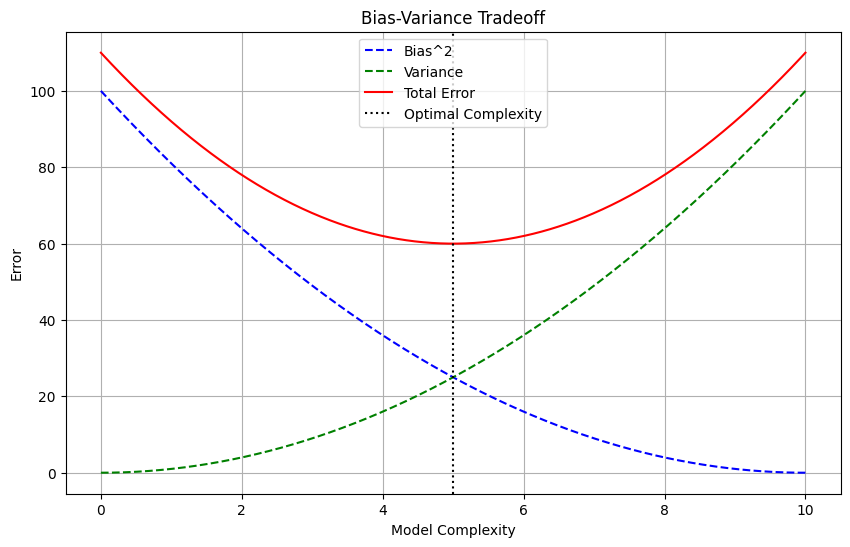

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def bias_variance_tradeoff():
    model_complexity = np.linspace(0, 10, 1000)
    
    bias = (10 - model_complexity)**2
    variance = model_complexity**2
    
    irreducible_error = np.ones_like(model_complexity) * 10
    total_error = bias + variance + irreducible_error
    
    plt.figure(figsize=(10, 6))
    plt.plot(model_complexity, bias, label='Bias^2', color='blue', linestyle='--')
    plt.plot(model_complexity, variance, label='Variance', color='green', linestyle='--')
    plt.plot(model_complexity, total_error, label='Total Error', color='red', linestyle='-')
    plt.axvline(x=5, color='black', linestyle=':', label='Optimal Complexity')
    
    plt.title('Bias-Variance Tradeoff')
    plt.xlabel('Model Complexity')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

bias_variance_tradeoff()

* Bias decreases as model complexity increases; this is because the model is more flexible and fits better the data.
* Variance increases with model complexity; the model becomes more sensitive to the fluctuations in the training data (noise), leading to overfitting.
* Total Error is the combination of bias, variance, and irreducible error. The optimal point is where this total error is minimized, balancing bias and variance.

## Q2: What about the B-V tradeoff in DL Systems?

The tradeoff in DL has some unique characteristics compared to traditional ML models due to the complexity and capacity of deep neural networks.

1. Capacity of Deep Networks:

Deep neural networks have a very high capacity, meaning they can learn highly complex functions and potentially fit very convoluted patterns in the data. This can reduce bias but increases the risk of high variance, and thus prone to __overfitting__; it appears especially if the model is trained for too long or with insufficient regularization.

2. Regularization Techniques:

__Dropout__: A common regularization method in DL that randomly drops units during training, preventing the network from becoming too reliant on particular paths, and thus reducing variance.

__Weight Decay (L2 Regularization)__: Penalizes large weights in the network, helping to prevent overfitting by reducing variance.

__Early Stopping__: Stops training once the performance on a validation set starts to degrade, which helps to avoid overfitting.

3. Data Augmentation:

In DL, especially in tasks like computer vision, data augmentation is a powerful technique to reduce variance. 
By artificially increasing the size of the training set with modified versions of the existing data, the model becomes more robust and less likely to overfit.

4. Large Datasets:

When deep networks are trained on large datasets, they can often generalize well, even if the model is highly complex. This is because large datasets help in reducing variance without significantly increasing bias.

5. Double Descent Phenomenon:

As I depicted above, in traditional ML, the bias-variance tradeoff is typically depicted as a U-shaped curve where increasing model complexity initially reduces bias but eventually increases variance, leading to higher total error.

__Double Descent__: In DL, research showed a phenomenon called “double descent,” where increasing model complexity initially increases variance (as expected), but as the model becomes even more complex, the variance starts to decrease again. This can result in models that perform better even when they appear to be overfitting according to classical wisdom. More specifically there are two cases:

__Model DD__

Model DD is observed by varying the complexity of the model (e.g. the number of parameters or the norm of the model). As the complexity increases, the test error first decreases and then increases to a peak around when the model size is large enough to fit all the training data very well, and then decreases again in the so-called over-parameterized regime, where the number of parameters is larger than the number of data points.

<img src="model_dd.png" width="300" height="300" />

__Sample DD__

The DD is observed by varying the size of the training dataset. Some research observed that the generalization error doesn’t strictly decrease as we increase the sample size. Instead, it decreases first, and increases to peak around when the number of samples is similar to the number of parameters, and then decreases again.

<img src="sample_dd.png" width="300" height="300" />

6. Transfer Learning:

__Pre-trained Models__: Transfer learning, where a DNN is pre-trained on a large dataset and then fine-tuned on a smaller but task-specific dataset, can help to balance bias and variance. The pre-trained model usually captures general patterns (low bias), while fine-tuning adapts it to the specific task without needing excessive complexity (reducing variance).

#### Practical Considerations for Training DDN

__Model Selection__: In deep learning, model selection (select an architecture, number of layers, etc.) often involves balancing bias and variance through validation techniques. However, DNN tend to have a low bias naturally due to their complexity, so the focus is often on managing variance.

__Hyperparameter Tuning__: Careful tuning of hyperparameters like learning rate, batch size, and regularization strength is crucial for managing the bias-variance tradeoff.

## Q3: Can you explain what is regularization, and the difference between L1 and L2?

It's a technique used in ML/DL to prevent overfitting; It works by adding a penalty to the model’s complexity; the penalty increases with the complexity of the model, effectively reducing the model’s complexity by penalizing large weights. This way the model does not fit to the noise in the training data, putting its focus on capturing the underlying patterns that generalize well to unseen data. This is especially important in models that have a high capacity, such as DNN.

 ### L1: Lasso (Least Absolute Shrinkage and Selection Operator)
 Adds a penalty proportional to the sum of the absolute values of the model parameters (weights). The regularization term is added to the loss function as follows:

$$
 Loss = Loss_{original} + \lambda \sum_{i=1}^{n} |w_i|
$$

1. $\lambda$  is the regularization strength (a hyperparameter you can tune).
2. $w_i$  are the model parameters (weights).

### L2: Regularization (Ridge)

Adds a penalty proportional to the sum of the squared values of the model parameters:

$$
Loss = Loss_{original} + \lambda \sum_{i=1}^{n} w_i^2
$$

#### L1 vs. L2 Regularization

L1 Regularization:
1. Tends to produce sparse models (some weights are exactly zero).
2. Can be used for feature selection.
3. Leads to simpler, more interpretable models.

L2 Regularization:
1. Shrinks all coefficients but does not eliminate any.
2. Generally better when you believe all features contribute to the model.
3. Produces smoother models with smaller coefficients, which is often preferred in scenarios where overfitting is a concern.